# Wine Dataset - Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_wine = pd.read_csv('Data/wine.csv')
df_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df_wine.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

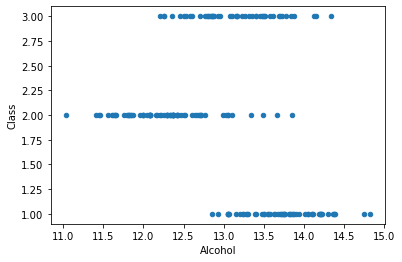

In [4]:
df_wine.plot.scatter(x = 'Alcohol', y = 'Class')

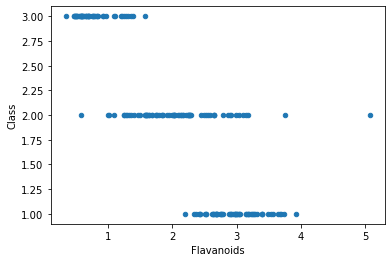

In [5]:
df_wine.plot.scatter(x = 'Flavanoids', y = 'Class')

In [6]:
df_wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df_wine.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

In [8]:
df_wine.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [9]:
# Using log to bring the skewed values to normal form

df_wine['Malic acid'] = np.log1p(df_wine['Malic acid'])
df_wine['Magnesium'] = np.log1p(df_wine['Magnesium'])

In [10]:
df_wine.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              0.529222
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               0.605723
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

In [11]:
# Check the outliers

from scipy.stats import zscore

z_score = abs(zscore(df_wine))
print(df_wine.shape)
df_final = df_wine.loc[(z_score <3).all(axis=1)]
print(df_final.shape)

(178, 14)
(169, 14)


In [12]:
df_final.skew()

Class                   0.115898
Alcohol                -0.028501
Malic acid              0.500985
Ash                    -0.237076
Alcalinity of ash       0.094253
Magnesium               0.270563
Total phenols           0.123229
Flavanoids             -0.087167
Nonflavanoid phenols    0.490435
Proanthocyanins         0.347248
Color intensity         0.738189
Hue                    -0.124661
diluted wines          -0.292646
Proline                 0.749334
dtype: float64

In [13]:
x = df_final.iloc[:, 1:]
y = df_final.iloc[:,0]

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

xt = sc.fit_transform(x)
xt

array([[ 1.51790865, -0.535413  ,  0.25649953, ...,  0.40971209,
         1.85604081,  0.98640617],
       [ 0.21142942, -0.45315102, -0.93960342, ...,  0.4551938 ,
         1.12510258,  0.93933453],
       [ 0.16069237,  0.15808131,  1.24637784, ...,  0.36423039,
         0.80180298,  1.36297928],
       ...,
       [ 0.30021927,  1.61603611, -0.44466427, ..., -1.63696452,
        -1.46129424,  0.26464103],
       [ 0.17337663,  0.37165688,  0.00902995, ..., -1.59148282,
        -1.37695522,  0.28033157],
       [ 1.39106601,  1.50415195,  1.53509234, ..., -1.54600112,
        -1.40506823, -0.59833903]])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

max_acc_scr = 0
for r_st in range(1, 5):
    x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size = 0.3, random_state = r_st)
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    
    acc_scr = accuracy_score(y_test, y_pred)
    
    if max_acc_scr < acc_scr:
        max_acc_scr = acc_scr
        final_r_st = r_st
print('Max accuracy_score %s according to random state : %s' %(max_acc_scr, r_st))

Max accuracy_score 1.0 according to random state : 4


In [16]:
x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size = 0.3, random_state = 4)
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
print('Accuracy score: %s' % accuracy_score(y_test, y_pred))

Accuracy score: 1.0


In [17]:
from sklearn.model_selection import cross_val_score

print('Mean: %s' % cross_val_score(LogisticRegression(), xt, y, cv=10, scoring='accuracy').mean())

print('Standard Deviation : %s' % cross_val_score(LogisticRegression(), xt, y, cv=10, scoring='accuracy').std())

Mean: 0.9882352941176471
Standard Deviation : 0.02352941176470589


In [18]:
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('\nClassification Report : \n', classification_report(y_test, y_pred))

Confusion Matrix : 
 [[19  0  0]
 [ 0 20  0]
 [ 0  0 12]]

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        12

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [19]:
import joblib

joblib.dump(lg, 'lg_wine.pkl')

['lg_wine.pkl']